# Getting the data

In [1]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup

In [2]:
finviz_url = 'https://finviz.com/quote.ashx?t='

In [3]:
tickers = ['AMZN','TSLA','AAPL','GOOG','PFE','FB']


In [4]:
news_tables = {}
for ticker in tickers:
  url = finviz_url+ticker

  req = Request(url = url, headers ={'user-agent': 'my-app'})
  response = urlopen(req)

  html = BeautifulSoup(response, 'html')
  news_table = html.find(id='news-table')
  news_tables[ticker] = news_table

# Parsing and Manipulating Data

In [5]:
amzn_data = news_tables['AMZN']
amzn_rows = amzn_data.findAll('tr')


for index, row in enumerate(amzn_rows):
  title = row.a.text
  timestamp = row.td.text
  print(timestamp + " " +title)

Dec-09-20 07:23PM   Facebook Risks Instagram-WhatsApp Breakup in Antitrust Case
04:40PM   Will Amazon Or Shopify Stock Grow More By 2022?
04:07PM   Cloud Stocks To Watch: Fast-Growing Real Estate Firm Rises Toward Breakout
03:40PM   Microsoft, Unilever and a Finnish oil refiner believe Amazon has it right with climate pledge
03:26PM   Facebook Is Hit With Lawsuits by 46 States and the FTC
02:43PM   Google's Ethics Effort Is Looking Rather Evil
02:41PM   Microsoft, Unilever Join Amazon Vow to Fight Climate Change
02:38PM   Facebook sued by FTC, 48 attorneys general alleging it operates an illegal monopoly
01:39PM   Post Corona Author Scott Galloway Explores the Future, Analyzes the Past
12:59PM   COVID-19 pandemic has forever changed the pet products business: Chewy CEO
12:35PM   Your 2020 Lockdown Holiday Gift Guide Is Here
12:30PM   GameStop Needs a Reboot to Ride the Gaming Boom
12:29PM   Want to Buy Amazon (AMZN) Stock? Heres What You Need to Know
12:00PM   Better Buy: Amazon vs. Pe

In [6]:
parsed_data = []  

for ticker, news_table in news_tables.items():

  for row in news_table.findAll('tr'):
    title = row.a.text
    date_data = row.td.text.split(' ')

    if len(date_data) ==1:     # 12:06PM 
      time = date_data[0]  
    else:                 # Dec-05-20 03:38PM 
      date = date_data[0]
      time = date_data[1]   

    parsed_data.append([ticker,date,time,title])

print(parsed_data)

[['AMZN', 'Dec-09-20', '07:23PM\xa0\xa0', 'Facebook Risks Instagram-WhatsApp Breakup in Antitrust Case'], ['AMZN', 'Dec-09-20', '04:40PM\xa0\xa0', 'Will Amazon Or Shopify Stock Grow More By 2022?'], ['AMZN', 'Dec-09-20', '04:07PM\xa0\xa0', 'Cloud Stocks To Watch: Fast-Growing Real Estate Firm Rises Toward Breakout'], ['AMZN', 'Dec-09-20', '03:40PM\xa0\xa0', 'Microsoft, Unilever and a Finnish oil refiner believe Amazon has it right with climate pledge'], ['AMZN', 'Dec-09-20', '03:26PM\xa0\xa0', 'Facebook Is Hit With Lawsuits by 46 States and the FTC'], ['AMZN', 'Dec-09-20', '02:43PM\xa0\xa0', "Google's Ethics Effort Is Looking Rather Evil"], ['AMZN', 'Dec-09-20', '02:41PM\xa0\xa0', 'Microsoft, Unilever Join Amazon Vow to Fight Climate Change'], ['AMZN', 'Dec-09-20', '02:38PM\xa0\xa0', 'Facebook sued by FTC, 48 attorneys general alleging it operates an illegal monopoly'], ['AMZN', 'Dec-09-20', '01:39PM\xa0\xa0', 'Post Corona Author Scott Galloway Explores the Future, Analyzes the Past'],

# Sentiment Analysis

In [7]:
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()

import pandas as pd


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [8]:
df = pd.DataFrame(parsed_data, columns=['ticker','date','time','title'])
df.head()

,ticker,date,time,title
0,AMZN,Dec-09-20,07:23PM,Facebook Risks Instagram-WhatsApp Breakup in A...
1,AMZN,Dec-09-20,04:40PM,Will Amazon Or Shopify Stock Grow More By 2022?
2,AMZN,Dec-09-20,04:07PM,Cloud Stocks To Watch: Fast-Growing Real Estat...
3,AMZN,Dec-09-20,03:40PM,"Microsoft, Unilever and a Finnish oil refiner ..."
4,AMZN,Dec-09-20,03:26PM,Facebook Is Hit With Lawsuits by 46 States and...


In [9]:
print(vader.polarity_scores("Hi Liz, thank you for having phone interview with you. Even though you have some valuable and outstanding skills and assests, unfortunatelly there are more appropriate candidates for this position. We can not move forward with you for this job position."))

{'neg': 0.0, 'neu': 0.798, 'pos': 0.202, 'compound': 0.8625}


In [10]:
print(vader.polarity_scores("Alex was infected virus, therefore he couldn't join the meeting today"))

{'neg': 0.361, 'neu': 0.639, 'pos': 0.0, 'compound': -0.6234}


In [11]:
print(vader.polarity_scores("You can trust me, I am expertise on financial analysis."))

{'neg': 0.0, 'neu': 0.708, 'pos': 0.292, 'compound': 0.5106}


In [12]:
print(vader.polarity_scores("I feel myself good when I watch scifiction movies"))

{'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'compound': 0.4404}


In [13]:
print(vader.polarity_scores("I think, one apple a day keeps you away from doctor!"))

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [14]:
print(vader.polarity_scores("I love you"))

{'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'compound': 0.6369}


In [15]:
function = lambda title: vader.polarity_scores(title)['compound']

In [16]:
df['compound'] = df['title'].apply(function)

In [17]:
df.head()

,ticker,date,time,title,compound
0,AMZN,Dec-09-20,07:23PM,Facebook Risks Instagram-WhatsApp Breakup in A...,-0.2732
1,AMZN,Dec-09-20,04:40PM,Will Amazon Or Shopify Stock Grow More By 2022?,0.1779
2,AMZN,Dec-09-20,04:07PM,Cloud Stocks To Watch: Fast-Growing Real Estat...,0.0000
3,AMZN,Dec-09-20,03:40PM,"Microsoft, Unilever and a Finnish oil refiner ...",0.1779
4,AMZN,Dec-09-20,03:26PM,Facebook Is Hit With Lawsuits by 46 States and...,-0.1531


# Visualisation of Sentiment Analysis

In [18]:
df['date'] = pd.to_datetime(df.date).dt.date

In [19]:
import matplotlib.pyplot as plt
mean_df = df.groupby(['ticker','date']).mean()

In [20]:
mean_df

compound
ticker date                
AAPL   2020-12-07  0.078316
       2020-12-08  0.099103
       2020-12-09  0.127986
AMZN   2020-12-05  0.134775
       2020-12-06 -0.073920
       2020-12-07  0.099848
       2020-12-08  0.237041
       2020-12-09  0.178088
FB     2020-12-03  0.023731
       2020-12-04 -0.012775
       2020-12-05  0.063325
       2020-12-07 -0.018524
       2020-12-08  0.067956
       2020-12-09 -0.139495
GOOG   2020-12-03 -0.140847
       2020-12-04  0.055300
       2020-12-05 -0.146475
       2020-12-06 -0.464467
       2020-12-07 -0.049773
       2020-12-08  0.172156
       2020-12-09  0.014883
PFE    2020-12-08  0.104846
       2020-12-09  0.097207
TSLA   2020-12-07  0.062683
       2020-12-08  0.091147
       2020-12-09  0.101537

In [21]:
mean_df = mean_df.unstack()
mean_df

compound                        ...                                 
date   2020-12-03 2020-12-04 2020-12-05  ... 2020-12-07 2020-12-08 2020-12-09
ticker                                   ...                                 
AAPL          NaN        NaN        NaN  ...   0.078316   0.099103   0.127986
AMZN          NaN        NaN   0.134775  ...   0.099848   0.237041   0.178088
FB       0.023731  -0.012775   0.063325  ...  -0.018524   0.067956  -0.139495
GOOG    -0.140847   0.055300  -0.146475  ...  -0.049773   0.172156   0.014883
PFE           NaN        NaN        NaN  ...        NaN   0.104846   0.097207
TSLA          NaN        NaN        NaN  ...   0.062683   0.091147   0.101537

[6 rows x 7 columns]

In [22]:
mean_df = mean_df.xs('compound', axis='columns').transpose()
mean_df

ticker,AAPL,AMZN,FB,GOOG,PFE,TSLA
date,,,,,,
2020-12-03,NaN,NaN,0.023731,-0.140847,NaN,NaN
2020-12-04,NaN,NaN,-0.012775,0.055300,NaN,NaN
2020-12-05,NaN,0.134775,0.063325,-0.146475,NaN,NaN
2020-12-06,NaN,-0.073920,NaN,-0.464467,NaN,NaN
2020-12-07,0.078316,0.099848,-0.018524,-0.049773,NaN,0.062683
2020-12-08,0.099103,0.237041,0.067956,0.172156,0.104846,0.091147
2020-12-09,0.127986,0.178088,-0.139495,0.014883,0.097207,0.101537


<Figure size 864x720 with 0 Axes>

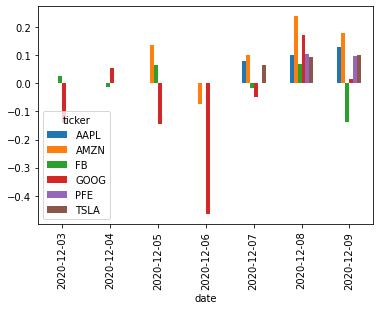

In [28]:
mean_df.plot(kind='bar')
plt.show()

In [33]:
mean_df.columns

Index(['AAPL', 'AMZN', 'FB', 'GOOG', 'PFE', 'TSLA'], dtype='object', name='ticker')